# Semi-supervised learning

Piotr Przetacznik

## Introduction

There are three main approaches in machine learning: supervised learning, unsupervised learning and reinforcement learning. These approaches can be combined together. This document shows very simple usage of semi-supervised learning which is a combination of unsupervised and supervised method. Classic machine learning is usually considered as supervised learning method and is based on approximation in high dimentional space. In practice, a classifier tries to learn class assigned for given objects on the training dataset and to assign the class for unknown objects based on what it has learnt before. For example, if we have training dataset which consists of pairs $x$ and $y$. We want to find a function $f$ that returns $y$ for given $x$, $f(x) = y$. When training is complete, it's possible to run the classifier on dataset with unknown classes by simply calculating $f(x_{new\_point})$ for new points $x$.

Unfortunately supervised learning approach is often struggling with a major problem of insufficient amount of training examples. There are few ways to deal with that and improve classification accuracy. First of all, we can create some tools for data augmentation. Eg. if we are operating on images, very good idea would be to increase number of examples by rotating objects or creating mirror reflexes so the object is similar but many pixesls have changed their state. Novel ideas come with *autoencoders* or other generative methods that can generate many possible variations of given objects after learning the structure of data.

This brings us to the idea where we can, first of all, analyse structure of data we have. This can be done with unsupervised learning that can anylise the manifold. Data visualisation can be powerfull tool for extracting knowledge out of the data. If we find a method that can differentiate some data clusters, we can make the task much more easier for supervised methods. There are many ways how we can support our classifiers with manifold learning methods. We can imagine algorithms such as *principal component analysis*  which can deal the *curse of dimentionality effect* by reducing dimentionality and shows dimentions that are the most important for clusters differentiating. Moreover, it's possible to learn the manifold with *autoencoders*, *generative adversarial networks* or other algorithms and create generative models that can hold data representation we could use to generate more test cases that can be used for proper training. *GANs* are very interesting in that case their rate the veracity of generated data with classifier that is explicitely specialised for this task.

## Methods

The task is to achieve the best accuracy of classification on Libras Movement dataset. Dataset has been split into train and test subsets with 8 different ratios 20%:80%, 30%:70%, 40%:60%, 50%:50%, 60%:40%, 70%:30%, 80%:20% and 90%:10%. Different ratios should show differences of clustering improvement impact when training dataset is smaller or bigger. Also calculating accuracy is done with cross validation by repeating experiment 10 times and average taking average result. Training samples are choosed by taking random sample out of every class so each group have their representatives in train set.

This notebook shows very simple and effective method of supervised learning method supported by preparing data with unsupervised learning method. This test consists of comparison of simple *support vector machine* and *svm* used on dataset prepared by *hierarchical clustering* *Ward's method*. First part of task is to perform clustering on full dataset but using classes only from training dataset. Each cluster was parsed and if it consisted only of samples that were from one group and unknown group (samples that belong to the test subset) then the whole cluster was assigned to the known class. Otherwise, if cluster contained samples assigned to zero, two or more classes then samples' classes were left unchanged. This way, training set were increased by samples taken from testing which are undoubtly very similar to those in training dataset with assigned classes and can be easily classified based on simple data visualiastion or manifold analysis.


## Libras Movement Data Set

*Description taken from UCI* (https://archive.ics.uci.edu/ml/datasets/Libras+Movement).

The dataset (movement_libras) contains 15 classes of 24 instances each, where each class references to a hand movement type in LIBRAS. 

In the video pre-processing, a time normalization is carried out selecting 45 frames from each video, in according 
to an uniform distribution. In each frame, the centroid pixels of the segmented objects (the hand) are found, which 
compose the discrete version of the curve F with 45 points. All curves are normalized in the unitary space. 

In order to prepare these movements to be analysed by algorithms, we have carried out a mapping operation, that is, each 
curve F is mapped in a representation with 90 features, with representing the coordinates of movement. 

Some sub-datasets are offered in order to support comparisons of results. 

## References

[1] [Nonlinear dimensionality reduction](https://en.wikipedia.org/wiki/Nonlinear_dimensionality_reduction)

[2] [Ward's method](https://en.wikipedia.org/wiki/Ward%27s_method)

[3] [Libras Movement dataset at UCI](https://archive.ics.uci.edu/ml/datasets/Libras+Movement)

## Implementation

For research purposes I would like to show how R and Python languages can be successfully used in the same project. I've used *rpy2* package for running R and transfering data between those two language. It's very easy to transfer dataframes and show plots from pandas using matplotlib as well as from R with usage of ggplot2.

First of all, we would like to load *rpy2* to use R in our notebook, we're loading our dataset and presenting overview of first rows in the dataset.

In [1]:
%load_ext rpy2.ipython

import rpy2
import pandas as pd

data_raw = pd.read_csv("movement_libras.data", header=None)
data_raw.head()

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,0.79691,0.38194,0.79691,0.37731,0.79884,0.37731,0.79497,0.37731,0.77563,0.35417,...,0.51389,0.39845,0.42593,0.47389,0.36111,0.55899,0.31250,0.63830,0.29398,1
1,0.67892,0.27315,0.68085,0.27315,0.68085,0.27315,0.68085,0.27315,0.67892,0.26852,...,0.57407,0.17795,0.63657,0.17215,0.67361,0.17021,0.69213,0.17215,0.69213,1
2,0.72147,0.23611,0.72340,0.23611,0.72340,0.23611,0.72340,0.23611,0.72340,0.23611,...,0.30556,0.59768,0.25926,0.67118,0.25231,0.73501,0.26620,0.78143,0.27778,1
3,0.56480,0.32407,0.56286,0.32407,0.56093,0.32407,0.55899,0.32407,0.55899,0.32407,...,0.49074,0.26306,0.42361,0.33269,0.34722,0.41006,0.28009,0.49130,0.24306,1
4,0.67118,0.38426,0.67118,0.38657,0.67311,0.38657,0.67311,0.38426,0.67311,0.37963,...,0.76389,0.44101,0.64120,0.45068,0.54167,0.47776,0.44213,0.53191,0.34259,1


Installing necessary R packages. Please uncomment these lines if using these packages for the first time so you will install them in your system.

In [2]:
%%R

# Install necessary packages

# install.packages("dplyr")
# install.packages("magrittr")

# install.packages("MASS")
# install.packages("kernlab")
# install.packages("lattica")
# install.packages("class")
# install.packages("ggplot2")
# install.packages("GGally")
# install.packages("Rtsne")

library(dplyr)
library(magrittr)

/home/pankracy/.virtualenvs/testenv3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 
Attaching package: ‘dplyr’


  warnings.warn(x, RRuntimeWarning)
/home/pankracy/.virtualenvs/testenv3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: The following objects are masked from ‘package:stats’:

    filter, lag


  warnings.warn(x, RRuntimeWarning)
/home/pankracy/.virtualenvs/testenv3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


  warnings.warn(x, RRuntimeWarning)


We can transfer the dataset to the R and show overview as well.

In [3]:
%%R -i data_raw

head(data_raw)

/home/pankracy/.virtualenvs/testenv3/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)


       X0      X1      X2      X3      X4      X5      X6      X7      X8
0 0.79691 0.38194 0.79691 0.37731 0.79884 0.37731 0.79497 0.37731 0.77563
1 0.67892 0.27315 0.68085 0.27315 0.68085 0.27315 0.68085 0.27315 0.67892
2 0.72147 0.23611 0.72340 0.23611 0.72340 0.23611 0.72340 0.23611 0.72340
3 0.56480 0.32407 0.56286 0.32407 0.56093 0.32407 0.55899 0.32407 0.55899
4 0.67118 0.38426 0.67118 0.38657 0.67311 0.38657 0.67311 0.38426 0.67311
5 0.83366 0.35880 0.83752 0.37731 0.82979 0.38426 0.83172 0.37731 0.83172
       X9     X10     X11     X12     X13     X14     X15     X16     X17
0 0.35417 0.73501 0.32639 0.67505 0.30093 0.59381 0.29398 0.49710 0.32407
1 0.26852 0.66344 0.25694 0.63830 0.24769 0.59961 0.24074 0.54159 0.23843
2 0.23611 0.71567 0.23380 0.67505 0.22685 0.59188 0.22685 0.49710 0.25000
3 0.32407 0.55126 0.31019 0.52224 0.28472 0.46615 0.26852 0.39072 0.28241
4 0.37963 0.65957 0.36574 0.61702 0.35880 0.55706 0.38889 0.49323 0.45370
5 0.41667 0.80077 0.50231 0.73114 0.57

Presenting classes column.

In [4]:
%%R -i data_raw

data_raw[,91]

  [1]  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2
 [26]  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  3  3
 [51]  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  4  4  4
 [76]  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5
[101]  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6
[126]  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7
[151]  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8
[176]  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9
[201]  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 10 10
[226] 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11
[251] 11 11 11 11 11 11 11 11 11 11 11 11 11 11 12 12 12 12 12 12 12 12 12 12 12
[276] 12 12 12 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 13 13
[301] 13 13 13 13 13 13 13 1

Now, let's create boxplot that will show us some density of variables. It shows us that for each variable, more than half of points have this variable within range 0.25 to 0,75. We can tell that points are not very diverse and it won't be easy to catch differences between different classes of objects.

/home/pankracy/.virtualenvs/testenv3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: No id variables; using all as measure variables

  warnings.warn(x, RRuntimeWarning)


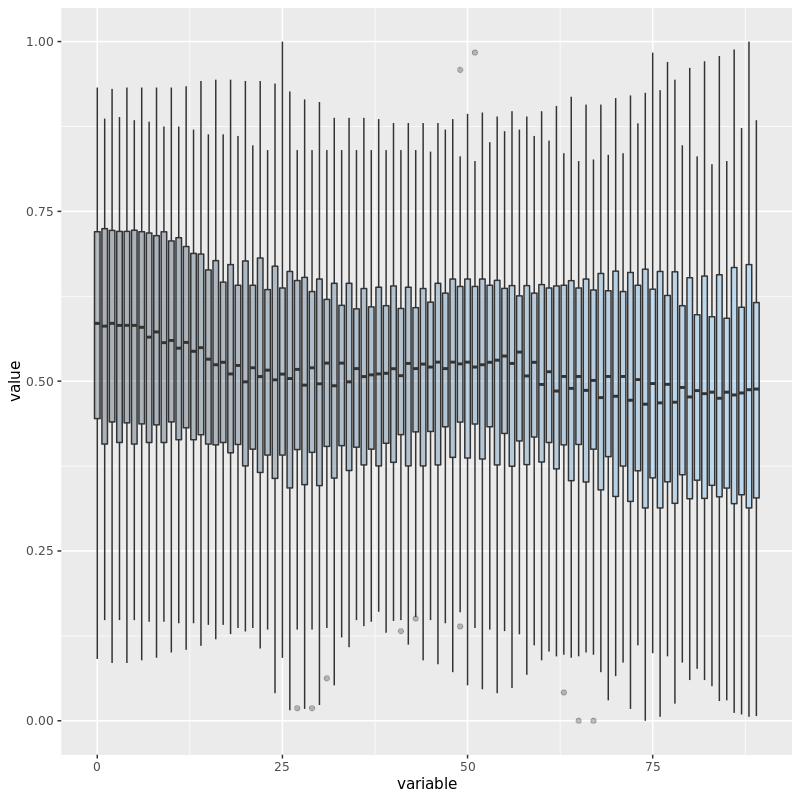

In [5]:
%%R -i data_raw -w 8 -h 8 --units in -r 100

library(ggplot2)
library(reshape2)

raw.data.melted <- melt(data_raw[,-91])
raw.data.melted <- cbind(lapply(raw.data.melted["variable"],
                                function(x) as.numeric(gsub('X', "", x))),
                         raw.data.melted["value"])
                        
ggplot(raw.data.melted,
       aes(x=variable, y=value, fill=variable)) + 
    geom_boxplot(alpha=0.3, aes(group = cut_width(variable, 1.0))) + 
    theme(legend.position="none")

Let's load the dataset once again. Now from R.

In [6]:
%%R

library(lattice)
library(class)
library(kernlab)
library(MASS)

raw.data <- read.csv("movement_libras.data",header=FALSE)
raw.variables <- raw.data[,1:90]
classes <- raw.data[,91]
head(raw.data)

/home/pankracy/.virtualenvs/testenv3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 
Attaching package: ‘kernlab’


  warnings.warn(x, RRuntimeWarning)
/home/pankracy/.virtualenvs/testenv3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: The following object is masked from ‘package:ggplot2’:

    alpha


  warnings.warn(x, RRuntimeWarning)
/home/pankracy/.virtualenvs/testenv3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 
Attaching package: ‘MASS’


  warnings.warn(x, RRuntimeWarning)
/home/pankracy/.virtualenvs/testenv3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: The following object is masked from ‘package:dplyr’:

    select


  warnings.warn(x, RRuntimeWarning)


       V1      V2      V3      V4      V5      V6      V7      V8      V9
1 0.79691 0.38194 0.79691 0.37731 0.79884 0.37731 0.79497 0.37731 0.77563
2 0.67892 0.27315 0.68085 0.27315 0.68085 0.27315 0.68085 0.27315 0.67892
3 0.72147 0.23611 0.72340 0.23611 0.72340 0.23611 0.72340 0.23611 0.72340
4 0.56480 0.32407 0.56286 0.32407 0.56093 0.32407 0.55899 0.32407 0.55899
5 0.67118 0.38426 0.67118 0.38657 0.67311 0.38657 0.67311 0.38426 0.67311
6 0.83366 0.35880 0.83752 0.37731 0.82979 0.38426 0.83172 0.37731 0.83172
      V10     V11     V12     V13     V14     V15     V16     V17     V18
1 0.35417 0.73501 0.32639 0.67505 0.30093 0.59381 0.29398 0.49710 0.32407
2 0.26852 0.66344 0.25694 0.63830 0.24769 0.59961 0.24074 0.54159 0.23843
3 0.23611 0.71567 0.23380 0.67505 0.22685 0.59188 0.22685 0.49710 0.25000
4 0.32407 0.55126 0.31019 0.52224 0.28472 0.46615 0.26852 0.39072 0.28241
5 0.37963 0.65957 0.36574 0.61702 0.35880 0.55706 0.38889 0.49323 0.45370
6 0.41667 0.80077 0.50231 0.73114 0.57

Transfering data from R back to the Python is also simple.

In [7]:
from rpy2.robjects import r, pandas2ri
pandas2ri.activate()

data_variables = rpy2.robjects.r['raw.variables']
data_variables.head()

/home/pankracy/.virtualenvs/testenv3/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90
0,0.79691,0.38194,0.79691,0.37731,0.79884,0.37731,0.79497,0.37731,0.77563,0.35417,...,0.34043,0.51389,0.39845,0.42593,0.47389,0.36111,0.55899,0.31250,0.63830,0.29398
1,0.67892,0.27315,0.68085,0.27315,0.68085,0.27315,0.68085,0.27315,0.67892,0.26852,...,0.19536,0.57407,0.17795,0.63657,0.17215,0.67361,0.17021,0.69213,0.17215,0.69213
2,0.72147,0.23611,0.72340,0.23611,0.72340,0.23611,0.72340,0.23611,0.72340,0.23611,...,0.52031,0.30556,0.59768,0.25926,0.67118,0.25231,0.73501,0.26620,0.78143,0.27778
3,0.56480,0.32407,0.56286,0.32407,0.56093,0.32407,0.55899,0.32407,0.55899,0.32407,...,0.20503,0.49074,0.26306,0.42361,0.33269,0.34722,0.41006,0.28009,0.49130,0.24306
4,0.67118,0.38426,0.67118,0.38657,0.67311,0.38657,0.67311,0.38426,0.67311,0.37963,...,0.46422,0.76389,0.44101,0.64120,0.45068,0.54167,0.47776,0.44213,0.53191,0.34259


Let's see mean values of each variable on the plot.

In [8]:
# %matplotlib inline
# import matplotlib
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg

data_variables.mean().plot()

### Linear Discriminant Analysis

Let's perform LDA (*linear discriminant analysis*) on the data. Please note that, LDA is performed on full dataset, not only training set. The reason is that small sample may not be good for visualisation full dataset.

In tha main experiment, we perform LDA only on the small sample (training subset) and the result is used to transform variables from training and testing subsets to the reduced form.

In [9]:
%%R

temp <- lda(V91 ~ . , data=raw.data)
ldax <- predict(temp, raw.variables)$x
head(ldax)

        LD1      LD2        LD3        LD4        LD5        LD6         LD7
1 -3.278785 9.019031 -1.7805842 -1.8416388 -1.1367612  1.7789585  0.32671573
2 -3.910873 4.451615  0.6823892  1.4640651  1.3806068 -0.9064981 -0.01891552
3 -2.283600 8.172211 -2.7258082 -0.9849338 -1.6921188 -3.2477499  0.65900698
4 -2.740623 7.438876 -1.2985917 -0.5663508 -1.3275851  0.2828771 -1.81580922
5 -2.693057 8.665392 -3.0625990 -3.3534048 -1.4788952 -0.9442811  0.59638315
6 -2.124595 5.020785 -0.8128262 -0.4363028 -0.5005548  1.8756421  0.47711773
         LD8         LD9        LD10        LD11       LD12       LD13
1  0.2301113  0.76269548 -0.85940710 -1.28156161 -1.0237213  1.1287463
2  2.2216912 -0.77630103 -0.54853480 -0.83852829  1.6721358 -1.3261941
3 -0.1839853  0.09369197  1.31988122 -0.08266614  0.6484712  0.7216235
4  1.5167022 -0.17405358  0.07908591  0.80218741  0.1694127  0.1575234
5 -1.8854728  1.48060187  0.96237274  0.19288743 -1.2483464  0.6692664
6  0.4672696 -0.78177750 -1.3332697

Four plots presenting different combinations of variables received by transforming initial data with LDA. Some clusters are emerging on these pictures.

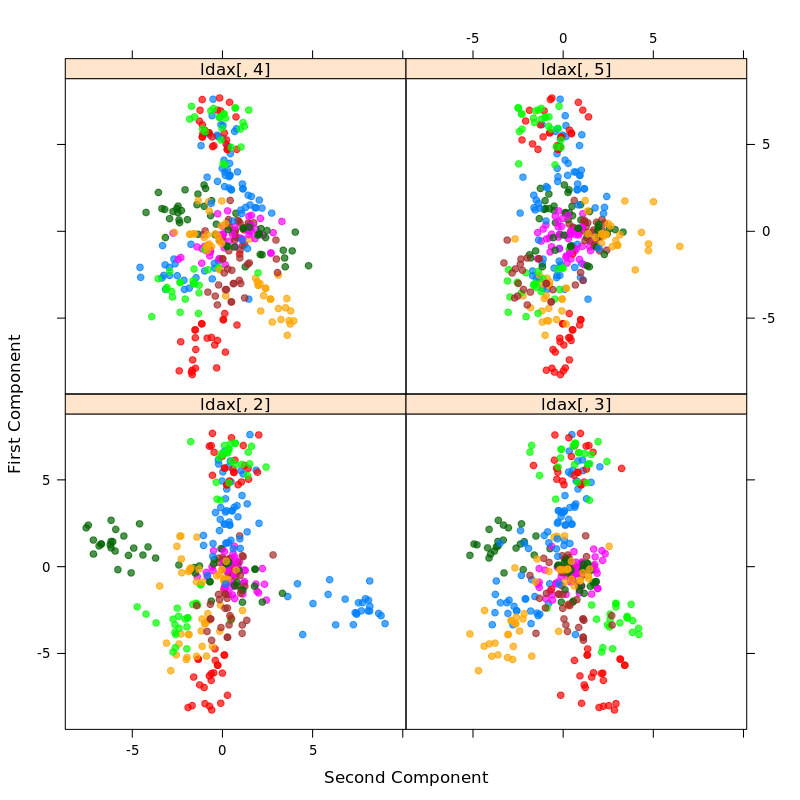

In [10]:
%%R -w 8 -h 8 --units in -r 100

lda.plot <- xyplot(ldax[, 1] ~ ldax[, 2] + ldax[, 3] + ldax[, 4] + ldax[, 5], groups=classes, pch=19, alpha = 0.7)
lda.plot$ylab <- "First Component"
lda.plot$xlab <- "Second Component"
lda.plot

/home/pankracy/.virtualenvs/testenv3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 
Attaching package: ‘GGally’


  warnings.warn(x, RRuntimeWarning)
/home/pankracy/.virtualenvs/testenv3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: The following object is masked from ‘package:dplyr’:

    nasa


  warnings.warn(x, RRuntimeWarning)
/home/pankracy/.virtualenvs/testenv3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 
  warnings.warn(x, RRuntimeWarning)
/home/pankracy/.virtualenvs/testenv3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:  plot: [1,1] [==>-----------------------------------------------]  6% est: 0s 
  warnings.warn(x, RRuntimeWarning)
/home/pankracy/.virtualenvs/testenv3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:  plot: [1,2] [=====>--------------------------------------------] 12% est: 5s 
  warnings.warn(x, RRuntim

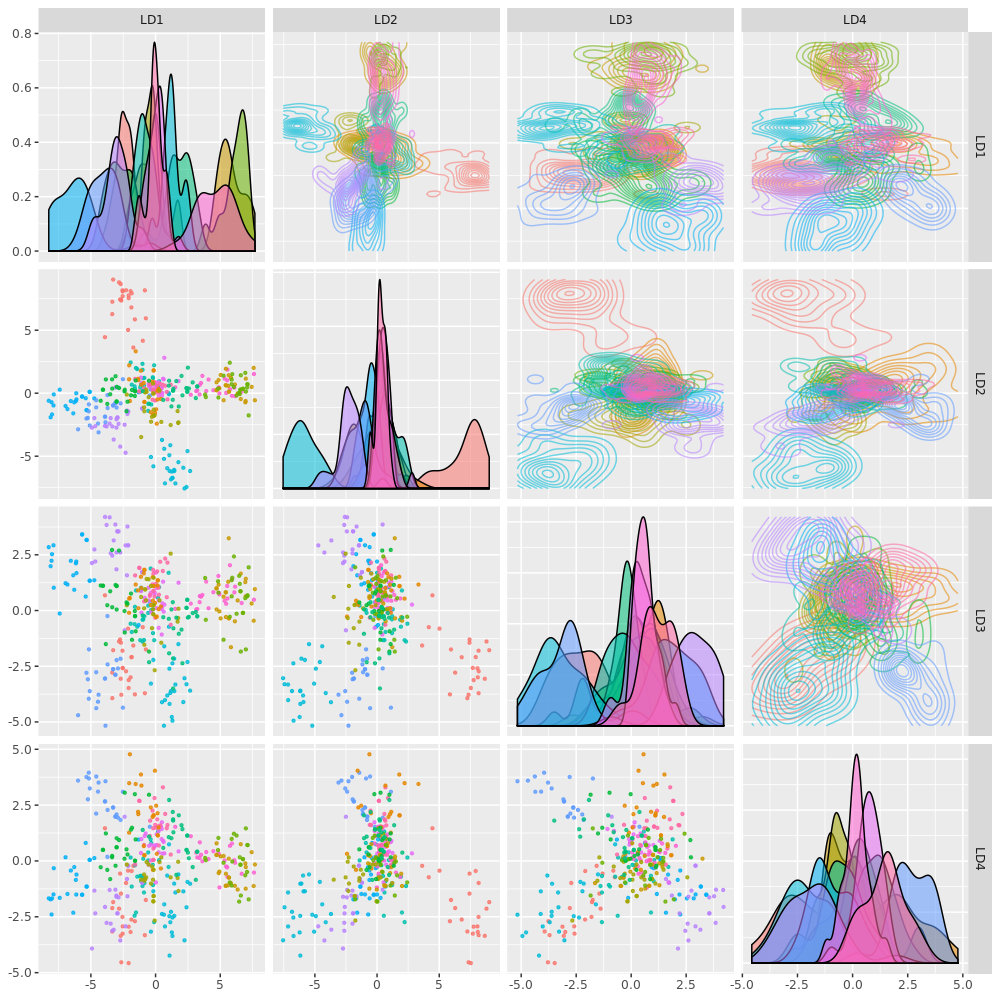

In [11]:
%%R -w 10 -h 10 --units in -r 100

library(ggplot2)
library(GGally)

classes.char <- as.character(classes)
my.data <- cbind(data.frame(ldax[, 1:4]), classes.char)
ggpairs(my.data,
        aes(colour = classes.char, alpha = 0.2),
        columns = 1:4,
        upper = list(continuous = "density"),
        lower = list(continuous = wrap("points", alpha = 0.8, size=0.8)))

### Principal Component Analysis

Performing PCA (*principal component analysis*) on the data. R provides very powerful tool for presenting all PCA dimentions on two dimensional vector. Only two components are visible on the plot but vectors shows 90 other dimensions toward which we can look for some interesting observations.  

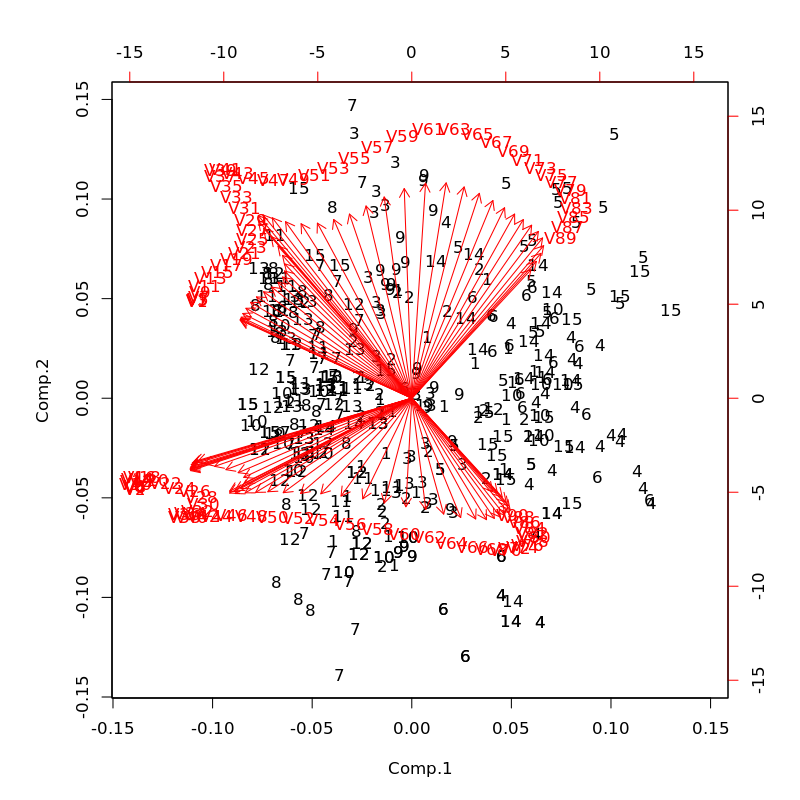

In [12]:
%%R -w 8 -h 8 --units in -r 100

data.matrix <- as.matrix(raw.variables)
rownames(data.matrix) <- classes
pca <- princomp(data.matrix, cor = TRUE)
biplot(pca)

In following plots we can see that data clearly form into some interesting clusters. Coloring points of each class shows that there is objects form into some kind of lines.

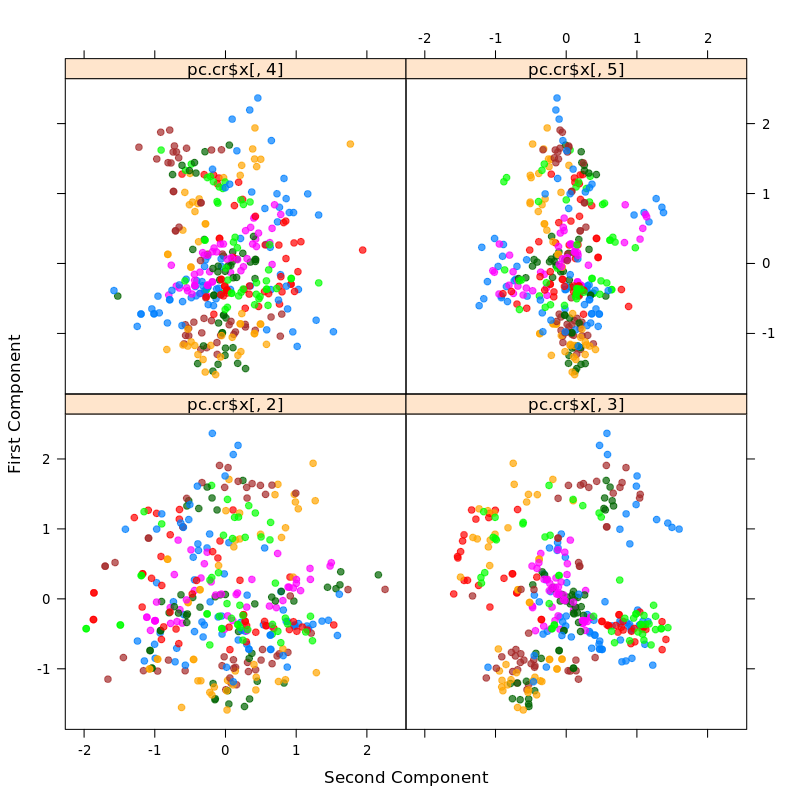

In [13]:
%%R -w 8 -h 8 --units in -r 100

pc.cr <- prcomp(raw.variables)
pca.plot <- xyplot(pc.cr$x[, 1] ~ pc.cr$x[, 2] + pc.cr$x[, 3] + pc.cr$x[, 4] + pc.cr$x[, 5], groups=classes, pch=19, alpha = 0.7)
pca.plot$ylab <- "First Component"
pca.plot$xlab <- "Second Component"
pca.plot

/home/pankracy/.virtualenvs/testenv3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:  plot: [1,2] [=====>--------------------------------------------] 12% est: 2s 
  warnings.warn(x, RRuntimeWarning)
/home/pankracy/.virtualenvs/testenv3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:  plot: [1,3] [========>-----------------------------------------] 19% est: 5s 
  warnings.warn(x, RRuntimeWarning)
/home/pankracy/.virtualenvs/testenv3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:  plot: [3,1] [===========================>----------------------] 56% est: 3s 
  warnings.warn(x, RRuntimeWarning)


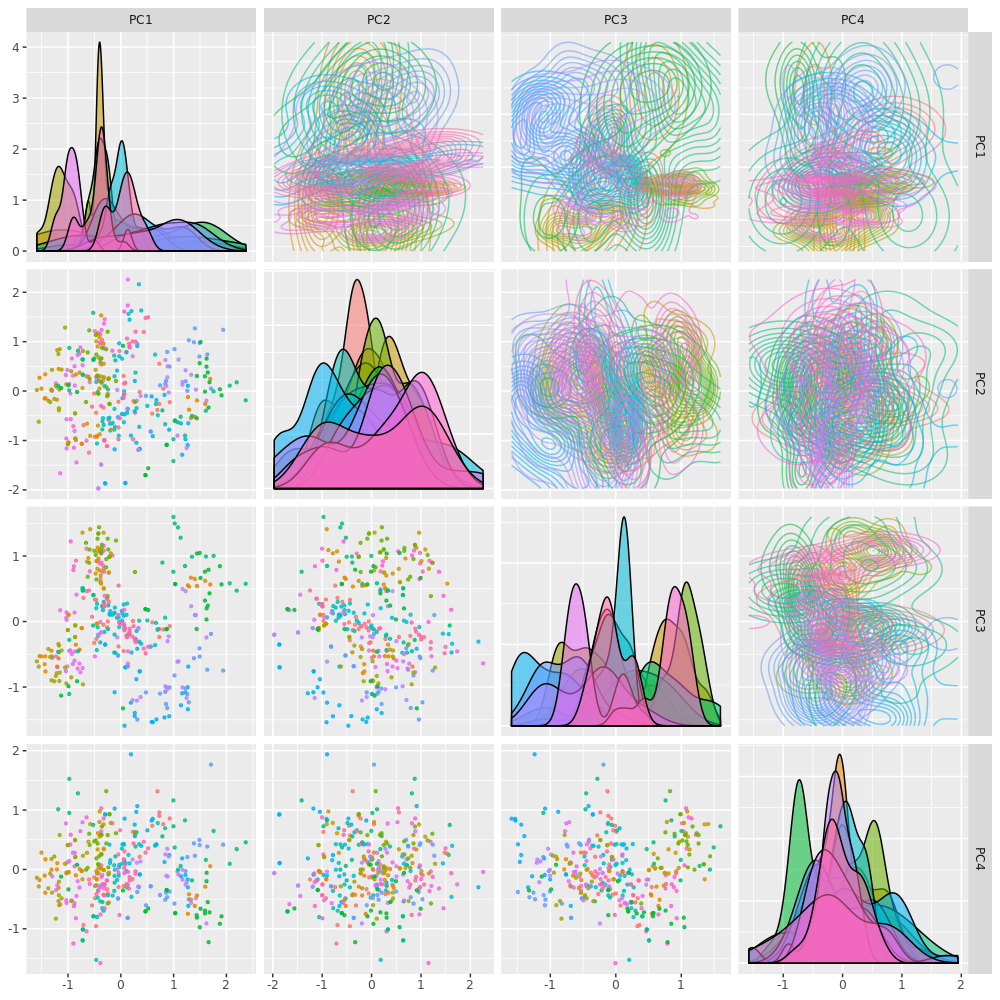

In [14]:
%%R -w 10 -h 10 --units in -r 100

library(ggplot2)
library(GGally)

classes.char <- as.character(classes)
my.data <- cbind(data.frame(pc.cr$x[,1:4]), classes.char)
# ggscatmat(my.data, columns = 1:4, color="classes.char", alpha=0.8)
ggpairs(my.data,
        aes(colour = classes.char, alpha = 0.2),
        columns = 1:4,
        upper = list(continuous = "density"),
        lower = list(continuous = wrap("points", alpha = 0.8, size=0.8)))

### T-distributed Stochastic Neighbor Embedding

Let's also check how t-SNE algorithm deals with the data.

Read the 360 x 50 data matrix successfully!
Using no_dims = 2, perplexity = 15.000000, and theta = 0.500000
Computing input similarities...
Normalizing input...
Building tree...
 - point 0 of 360
Done in 0.02 seconds (sparsity = 0.165571)!
Learning embedding...
Iteration 50: error is 61.714473 (50 iterations in 0.09 seconds)
Iteration 100: error is 59.902545 (50 iterations in 0.05 seconds)
Iteration 150: error is 59.642571 (50 iterations in 0.05 seconds)
Iteration 200: error is 59.534588 (50 iterations in 0.06 seconds)
Iteration 250: error is 59.510518 (50 iterations in 0.06 seconds)
Iteration 300: error is 0.490433 (50 iterations in 0.06 seconds)
Iteration 350: error is 0.423447 (50 iterations in 0.06 seconds)
Iteration 400: error is 0.409792 (50 iterations in 0.06 seconds)
Iteration 450: error is 0.401463 (50 iterations in 0.06 seconds)
Iteration 500: error is 0.394304 (50 iterations in 0.06 seconds)
Fitting performed in 0.62 seconds.


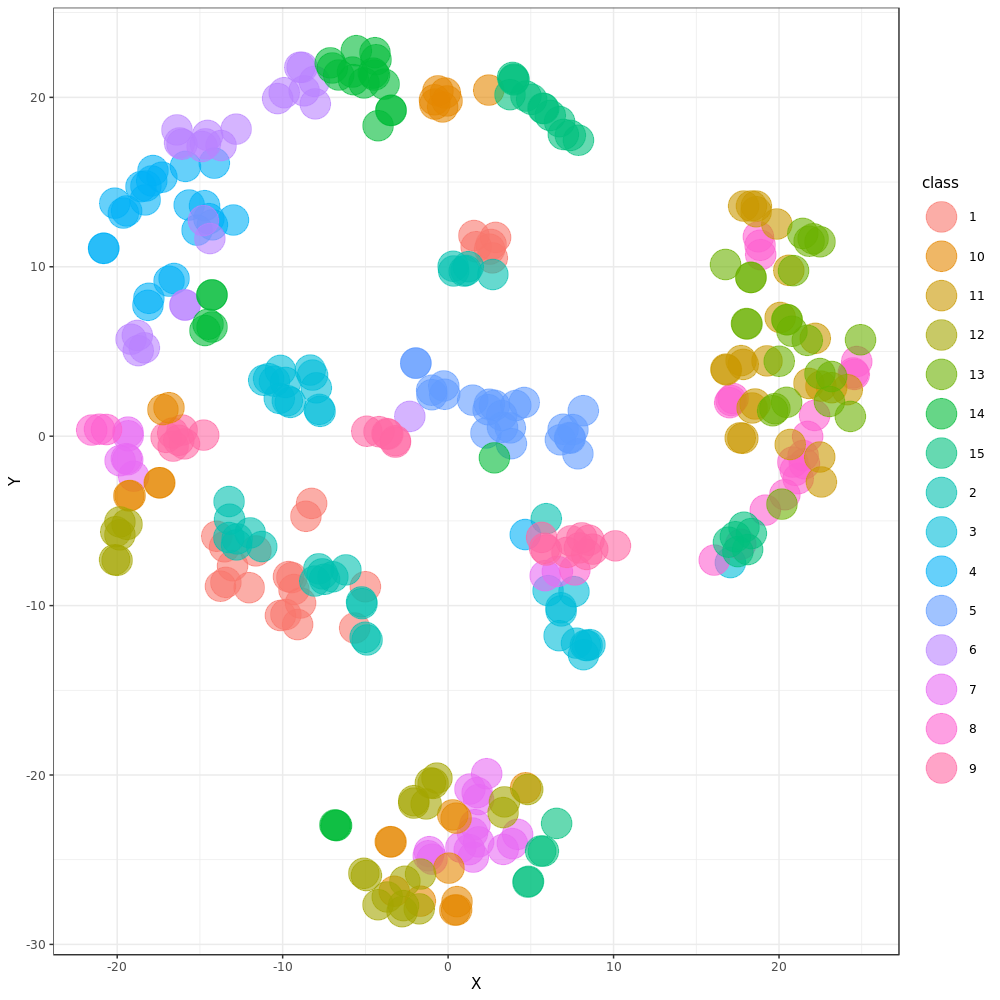

In [15]:
%%R -w 10 -h 10 --units in -r 100

library(Rtsne)

tsne <- Rtsne(as.matrix(raw.variables),
              dims=2,
              perplexity=15,
              verbose=TRUE,
              max_iter=500,
              check_duplicates = FALSE)
data.tsne <- data.frame(X=as.numeric(tsne$Y[,1]),
                        Y=as.numeric(tsne$Y[,2]),
                        class=as.character(classes))
ggplot(data=data.tsne, aes(x=X, y=Y, colour=class)) +
  geom_point(size=10, alpha=0.6) +
  theme_bw()

### Semi-supervised learning experiment

Let's perform the proper experiment. Following function ${FindNewClusters(\ldots)}$ is used for performing Ward's clustering on the dataset. It traverses through detected clusters and if cluster has objects of only one class then all objects of unknown classes are assigned to that class. 

In [16]:
%%R

FindNewClusters <- function(raw.variables, training.indexes, training.classes, clusters.num, verbose) { 
  d <- dist(raw.variables, method = "euclidean")
  fit <- hclust(d, method="ward") 
  groups <- cutree(fit, k=clusters.num)
  if (verbose == TRUE) {
    plot(fit)
    rect.hclust(fit, k=clusters.num, border="red")
  }

  for (i in 1:clusters.num) {
    cluster <- which(groups == i)
    cluster.train.subset <- cluster[cluster %in% training.indexes]
    cluster.train.subset <- cluster.train.subset[which(!is.na(cluster.train.subset))]
    if (length(cluster.train.subset) > 0) {
      leader <- classes[cluster.train.subset][1]
      if (!is.na(leader) && all(training.classes[cluster.train.subset] == leader) ) {
        cluster.not.in.train.subset <- cluster[!cluster %in% cluster.train.subset]
        if (length(cluster.not.in.train.subset) > 0) {
          training.indexes <- c(training.indexes, cluster.not.in.train.subset)
          training.classes[cluster.not.in.train.subset] <- leader
          if ( verbose == TRUE) {
            cat("added items", cluster.not.in.train.subset,
                "cluster:", cluster,
                "cluster.train.subset:", cluster.train.subset,
                "to class", leader, "\n")
          }
        }
      }
    }
  }
  return (list("training.indexes" = training.indexes,
               "classes" = training.classes))
}

Function ${GetKSVMComparison(\ldots)}$ tests thee classification methods. The first method uses only SVM classifier. The second method uses clustering and it performs SVM on the extended dataset and the third method is similar to the second method but it performs PCA on the whole dataset before doing clustering and classification.

In [17]:
%%R

CalculateKSVMPrecision <- function(filter, training.indexes, raw.variables, classes, classes.dim) {
  predicted <- predict(filter,
                       raw.variables[-training.indexes,])
  table.predicted.expected <- table(factor(round(predicted), levels = 1:classes.dim),
                                    factor(classes[-training.indexes], levels = 1:classes.dim))
  return (sum(diag(table.predicted.expected)) / sum(table.predicted.expected))
}

GetKSVMComparison <- function(raw.data, raw.variables, classes, training.indexes, clusters.num, max.pca.dim, classes.dim, verbose) {
  # SVM
  supervised.ksvm <- ksvm(x = as.matrix(raw.variables[training.indexes,]),
                          y = classes[training.indexes],
                          kernel="laplacedot",
                          kpar=list(sigma=0.05),
                          C=5,
                          cross=3)
  
  training.classes <- classes
  training.classes[which((!seq(1, length(classes)) %in% training.indexes) == TRUE)] = NA
  
  # Clustering + SVM
  new.train <- FindNewClusters(raw.variables, training.indexes, training.classes, clusters.num, verbose)  
  semi.supervised.ksvm <- ksvm(x = as.matrix(raw.variables[new.train$training.indexes,]),
                               y = new.train$classes[new.train$training.indexes],
                               kernel="laplacedot",
                               kpar=list(sigma=0.05),
                               C=5,
                               cross=3)
  
  # PCA + Clustering + SVM
  pc <- prcomp(raw.variables)
  raw.variables.transformed <- as.matrix(pc$x[,1:max.pca.dim])
  new.train <- FindNewClusters(raw.variables.transformed, training.indexes, training.classes, clusters.num, verbose)  
  semi.supervised.ksvm.pca <- ksvm(x = as.matrix(raw.variables.transformed[new.train$training.indexes,]),
                                   y = new.train$classes[new.train$training.indexes],
                                   kernel="laplacedot",
                                   kpar=list(sigma=0.05),
                                   C=5,
                                   cross=3)
  
  # LDA + Clustering + SVM
  lda.temp <- lda(V91 ~ . , data=raw.data[training.indexes,])
  raw.variables.transformed.lda <- predict(lda.temp, raw.variables)$x
  new.train <- FindNewClusters(raw.variables.transformed.lda, training.indexes, training.classes, clusters.num, verbose)  
  semi.supervised.ksvm.lda <- ksvm(x = as.matrix(raw.variables.transformed.lda[new.train$training.indexes,]),
                                   y = new.train$classes[new.train$training.indexes],
                                   kernel="laplacedot",
                                   kpar=list(sigma=0.05),
                                   C=5,
                                   cross=3)
  
  # Clustering + LDA + SVM
  new.train <- FindNewClusters(raw.variables, training.indexes, training.classes, clusters.num, verbose)
  lda.temp2 <- lda(V91 ~ . , data=raw.data[new.train$training.indexes,])
  raw.variables.transformed.lda2 <- predict(lda.temp2, raw.variables)$x
  semi.supervised.ksvm.lda2 <- ksvm(x = as.matrix(raw.variables.transformed.lda2[new.train$training.indexes,]),
                                    y = new.train$classes[new.train$training.indexes],
                                    kernel="laplacedot",
                                    kpar=list(sigma=0.05),
                                    C=5,
                                    cross=3)
  
  return (c(CalculateKSVMPrecision(supervised.ksvm, training.indexes, raw.variables, classes, classes.dim),
            CalculateKSVMPrecision(semi.supervised.ksvm, training.indexes, raw.variables, classes, classes.dim),
            CalculateKSVMPrecision(semi.supervised.ksvm.pca, training.indexes, raw.variables.transformed, classes, classes.dim),
           
            CalculateKSVMPrecision(semi.supervised.ksvm.lda, training.indexes, raw.variables.transformed.lda, classes, classes.dim),
            CalculateKSVMPrecision(semi.supervised.ksvm.lda2, training.indexes, raw.variables.transformed.lda2, classes, classes.dim)
           ))
}

Following code runs the experiment. There are few parameters that can be configured. We can increase number of dimensions left after performing PCA or we can make number of clusters bigger. If we have 90 clusters then for 360 examples it will give average 4 objects per cluster. We could make some more experiments with that value and maybe get better accuracy on different dataset.

/home/pankracy/.virtualenvs/testenv3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: The "ward" method has been renamed to "ward.D"; note new "ward.D2"

  warnings.warn(x, RRuntimeWarning)


Best result:
           method train.ratio    result
37 Clustering+SVM          90 0.7133333


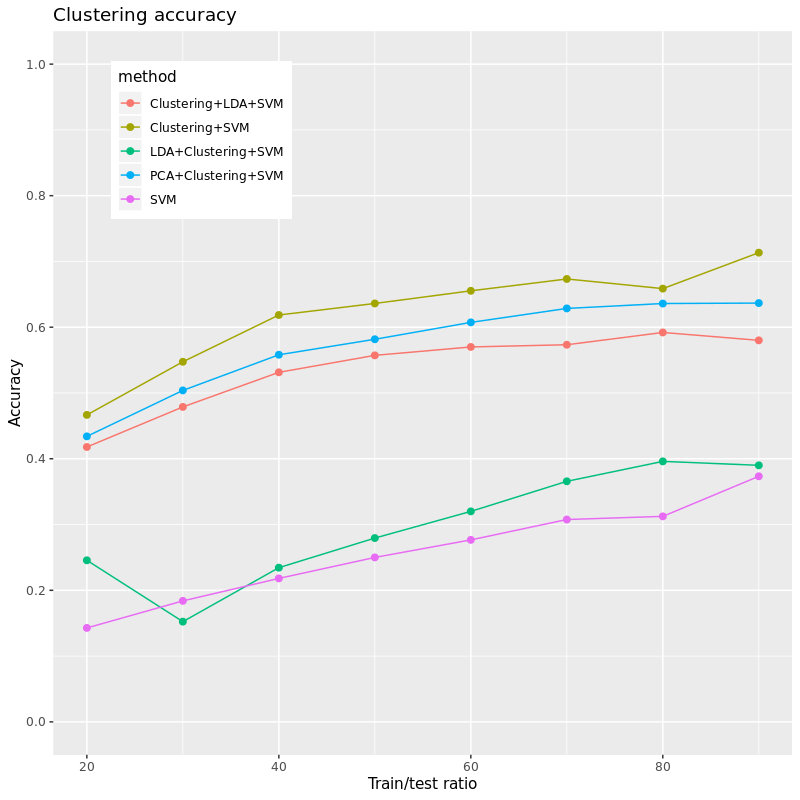

In [18]:
%%R -w 8 -h 8 --units in -r 100

classes.dim <- 15
pca.dim <- 40
clusters.num <- 90
repetitions.number = 10
results <- c()
for (train.ratio in seq(0.2, 0.9, by = 0.1)) {
  samples = c(0, 0, 0)
  for (j in 1:repetitions.number) {
    training.indexes <- vector()
    for (i in 1:classes.dim) {
      classes.indexes <- rownames(raw.data[raw.data[,91] == i,])
      training.indexes <- as.integer(c(training.indexes, sample(classes.indexes, round(length(classes.indexes) * train.ratio))))
    }
    samples <- samples + GetKSVMComparison(raw.data,
                                           raw.variables,
                                           classes,
                                           training.indexes,
                                           clusters.num,
                                           pca.dim,
                                           classes.dim,
                                           FALSE)
  }
  results <- rbind(results,
                   data.frame("method" = c("SVM", "Clustering+SVM", "PCA+Clustering+SVM", "LDA+Clustering+SVM", "Clustering+LDA+SVM"),
                              "train.ratio" = train.ratio*100,
                              "result" = samples / repetitions.number))
}
# print(results)

cat("Best result:\n")
print(results[which.max(results$result),])

ggplot(data=results, aes(x=train.ratio, y=result, group=method, colour=method)) +
  geom_line() +
  geom_point(size=2) +
  expand_limits(y=c(0,1)) +
  scale_y_continuous(minor_breaks = seq(0, 1, 0.1), breaks = seq(0, 1, 0.2)) +
  xlab("Train/test ratio") +
  ylab("Accuracy") +
  ggtitle("Clustering accuracy") +
  theme(legend.position=c(.2, .85))

## Summary

The best received classification accuracy for this problem was 72% (results may differ for each run) for Clustering+SVM solution at ratio 70% for training dataset and 30% for test dataset. For ratio with bigger training dataset we usually saw drop in accuracy that was probably caused by overfitting effect. What was unexpected is that performing PCA never helps for this problem. Ward's clustering method works fine even without PCA. Also LDA decreases the accuracy. We can also see that SVM without help from clusterisation achieves significantly worse results.

Based on these examples we can clearly see that using semi-supervised learning can bring measurable benefits. It can be used not only for generating more training examples but also it can support classification with knowledge it can explore.